In [1]:
xs = ['l1_X_14.pickle','l2_X_14.pickle','l3_X_14.pickle','l5_X_10.pickle','l7_X_9.pickle','l11_X_20.pickle','l13_X_10.pickle','l15_X_15.pickle','l17_X_25.pickle','l18_X_14.pickle']

In [2]:
ys = ['l1_Y_14.pickle','l2_Y_14.pickle','l3_Y_14.pickle','l5_Y_10.pickle','l7_Y_9.pickle','l11_Y_20.pickle','l13_Y_10.pickle','l15_Y_15.pickle','l17_Y_25.pickle','l18_Y_14.pickle']

In [3]:
ms = ['l1_model_14.pickle','l2_model_14.pickle','l3_model_14.pickle','l5_model_10.pickle','l7_model_9.pickle','l11_model_20.pickle','l13_model_10.pickle','l15_model_15.pickle','l17_model_25.pickle','l18_model_14.pickle']

In [49]:
import pickle
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import metrics
# myFig = plt.figure()

plt.figure(figsize=(8, 6), dpi=10)

plots = 0

<Figure size 80x60 with 0 Axes>

0.9850432957229074
0.970567648911598
0.9951051759626488
0.9887662888811224
0.9958472173869798
0.9698698520235336
0.9713353839626644
0.9690149374243037
0.9900940312767135
0.9889807162534435


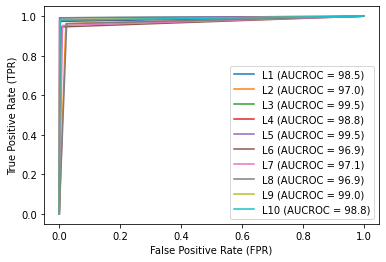

In [57]:
for i in range(10):
    # Import Model
    with open(f'models/{ms[i]}', "rb") as input_file:
        model = pickle.load(input_file)

    # Import X
    with open(f'datasets/{xs[i]}', "rb") as input_file:
        X = pickle.load(input_file)

    # Import Y
    with open(f'datasets/{ys[i]}', "rb") as input_file:
        Y = pickle.load(input_file)

    # Save Model as Temp JSON
    model.save_model("model.json")
    model = xgb.Booster()
    model.load_model("model.json")
    dtest = xgb.DMatrix(X)
    Y_pred = model.predict(dtest)
    Y_pred  = Y_pred > 0.5  
    Y_pred = Y_pred.astype(int)

    fpr, tpr, thresh = metrics.roc_curve(Y, Y_pred)
    auc = metrics.roc_auc_score(Y, Y_pred)
    print(auc)
    plt.plot(fpr,tpr,label=f"L{i+1} (AUCROC = {str(auc*100)[:4]})")

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
# plt.title("Sine and Cosine functions")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
plt.savefig('plot.pdf')
# To load the display window
plt.show()


<Figure size 432x288 with 0 Axes>

In [7]:
plt.show()